# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key +"&q=" + city
    print(city_url)
    
    # # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_json = city_weather.json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_json["coord"]["lat"]
        city_lng = city_json["coord"]["lon"]
        city_max_temp = city_json["main"]["temp_max"]
        city_humidity = city_json["main"]["humidity"]
        city_clouds = city_json["clouds"]["all"]
        city_wind = city_json["wind"]["speed"]
        city_country = city_json["sys"]["country"]
        city_date = city_json["dt"]

    #     # Append the City information into city_data list
        city_data.append({"City": city, 
                           "Lat": city_lat, 
                           "Lng": city_lng, 
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

#     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
#         pass
              
# # Indicate that Data Loading is complete 
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
https://api.openweathermap.org/data/2.5/weather?appid=b12f54dcdfa67ef6d396b983c24eab98&q=port macquarie
Processing Record 1 of Set 1 | port macquarie
-----------------------------
Data Retrieval Complete      
-----------------------------
https://api.openweathermap.org/data/2.5/weather?appid=b12f54dcdfa67ef6d396b983c24eab98&q=college
Processing Record 2 of Set 1 | college
-----------------------------
Data Retrieval Complete      
-----------------------------
https://api.openweathermap.org/data/2.5/weather?appid=b12f54dcdfa67ef6d396b983c24eab98&q=invercargill
Processing Record 3 of Set 1 | invercargill
-----------------------------
Data Retrieval Complete      
-----------------------------
https://api.openweathermap.org/data/2.5/weather?appid=b12f54dcdfa67ef6d396b983c24eab98&q=horta
Processing Record 4 of Set 1 | horta
-----------------------------
Data Retrieval Complete      
-----------------------------
https://api.open

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port macquarie,-31.4333,152.9167,280.97,91,100,0.89,AU,1721406171
1,college,64.8569,-147.8028,286.93,79,20,1.54,US,1721406172
2,invercargill,-46.4000,168.3500,278.40,94,77,2.30,NZ,1721406173
3,horta,38.5333,-28.6333,298.95,77,20,7.72,PT,1721406035
4,udachny,66.4167,112.4000,287.97,61,64,1.81,RU,1721406174


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port macquarie,-31.4333,152.9167,280.97,91,100,0.89,AU,1721406171
1,college,64.8569,-147.8028,286.93,79,20,1.54,US,1721406172
2,invercargill,-46.4000,168.3500,278.40,94,77,2.30,NZ,1721406173
3,horta,38.5333,-28.6333,298.95,77,20,7.72,PT,1721406035
4,udachny,66.4167,112.4000,287.97,61,64,1.81,RU,1721406174


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

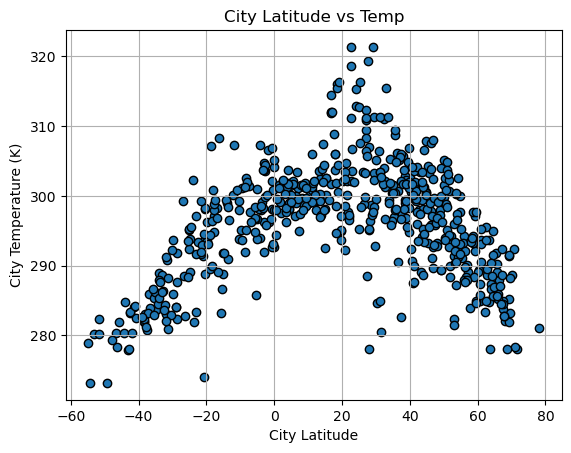

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",marker="o")

# Incorporate the other graph properties
plt.title ("City Latitude vs Temp")
plt.ylabel ("City Temperature (K)")
plt.xlabel ("City Latitude")
plt.grid(True) 
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

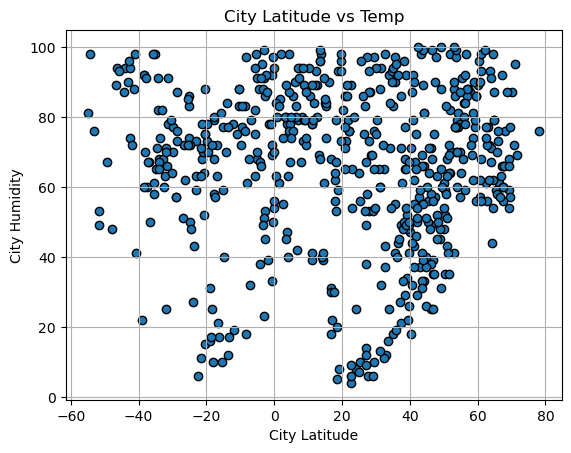

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",marker="o")

# Incorporate the other graph properties
plt.title ("City Latitude vs Temp")
plt.ylabel ("City Humidity")
plt.xlabel ("City Latitude")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

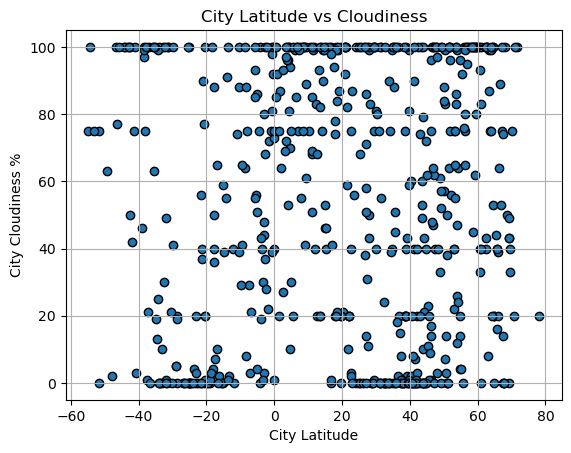

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",marker="o")

# Incorporate the other graph properties
plt.title ("City Latitude vs Cloudiness")
plt.ylabel ("City Cloudiness %")
plt.xlabel ("City Latitude")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

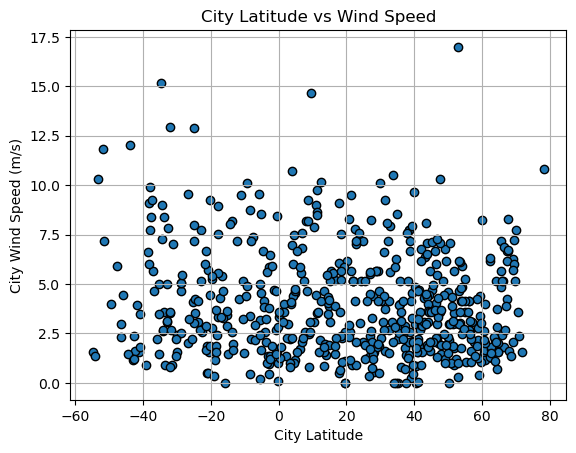

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",marker="o")

# Incorporate the other graph properties
plt.title ("City Latitude vs Wind Speed")
plt.ylabel ("City Wind Speed (m/s)")
plt.xlabel ("City Latitude")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def linear_regression_plots (x_values,y_values,header,coordinates):

    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    line_pt = slope * x_values + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


    plt.scatter(x_values,y_values)
    plt.plot(x_values, line_pt,"r-")
    plt.annotate(line_eq,(0,20),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel("")
    print(f"r-squared is: {rvalue}")
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,college,64.8569,-147.8028,286.93,79,20,1.54,US,1721406172
3,horta,38.5333,-28.6333,298.95,77,20,7.72,PT,1721406035
4,udachny,66.4167,112.4000,287.97,61,64,1.81,RU,1721406174
5,copala,16.6500,-98.9833,301.64,68,100,1.45,MX,1721406174
6,bilibino,68.0546,166.4372,282.05,76,100,1.59,RU,1721406175


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df)["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port macquarie,-31.4333,152.9167,280.97,91,100,0.89,AU,1721406171
2,invercargill,-46.4000,168.3500,278.40,94,77,2.30,NZ,1721406173
7,hermanus,-34.4187,19.2345,285.26,82,25,9.02,ZA,1721406175
9,afaahiti,-17.7500,-149.2833,297.08,79,40,8.93,PF,1721406176
10,ushuaia,-54.8000,-68.3000,278.94,81,75,1.54,AR,1721406058


###  Temperature vs. Latitude Linear Regression Plot

r-squared is: -0.5620585275324051


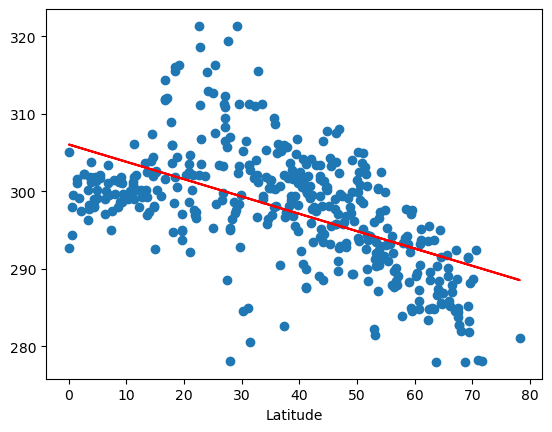

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
linear_regression_plots(x_values,y_values,'Max Temp',(6,30))


r-squared is: 0.8134725567080031


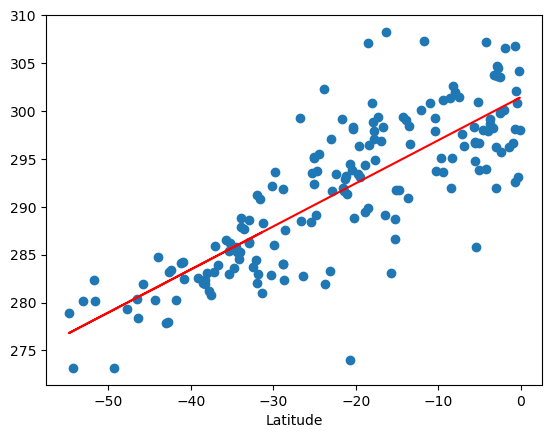

In [22]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
linear_regression_plots(x_values,y_values,'Max Temp',(-30,40))

**Discussion about the linear relationship:** With a r-squared of 56% this model shows a good fit but the relationship is scattered in a downward slope. The Latitude vs Mx Temp shows that temperature change in the northern region gets colder as the location changes. With a r-squared of 81% this model shows a good fit. The Latitude vs Max Temp shows that the temperature change depends on the location in the southern region

### Humidity vs. Latitude Linear Regression Plot

r-squared is: 0.00579702077713976


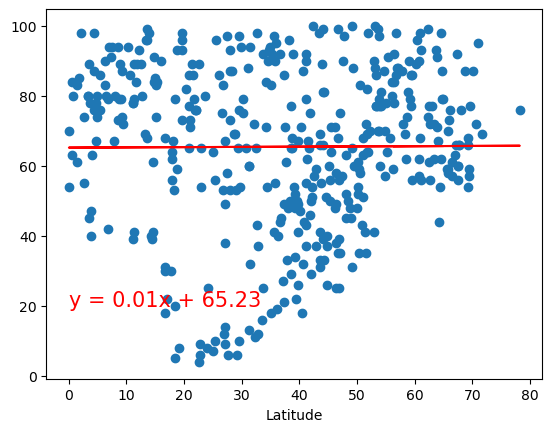

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
linear_regression_plots(x_values,y_values,'Humidity',(40,10))

r-squared is: -0.09761584009028569


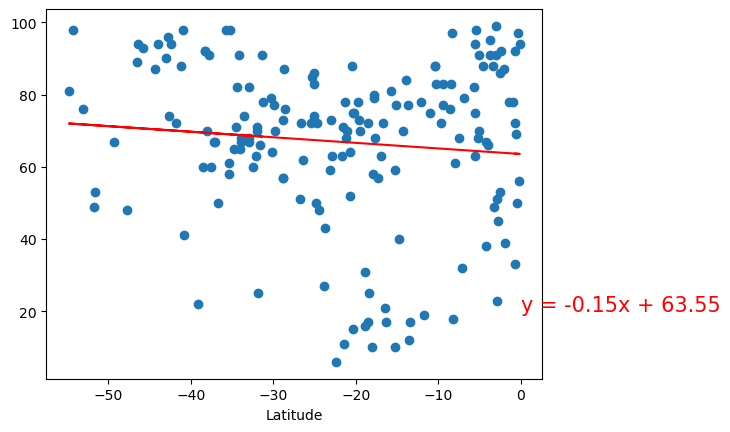

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
linear_regression_plots(x_values,y_values,'Humidity',(-30,150))

**Discussion about the linear relationship:** Both northern and southern regions does not show a good fit as the r-squared is .5% and 9%, respectively. There isnt a direct relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

r-squared is: -0.12847807236173406


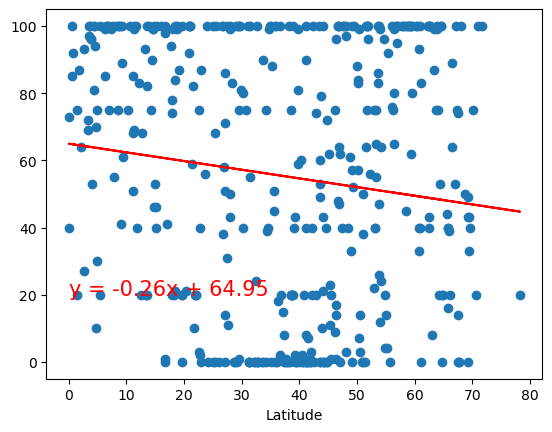

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
linear_regression_plots(x_values,y_values,'Cloudiness',(40,10))

r-squared is: -0.06091570503040225


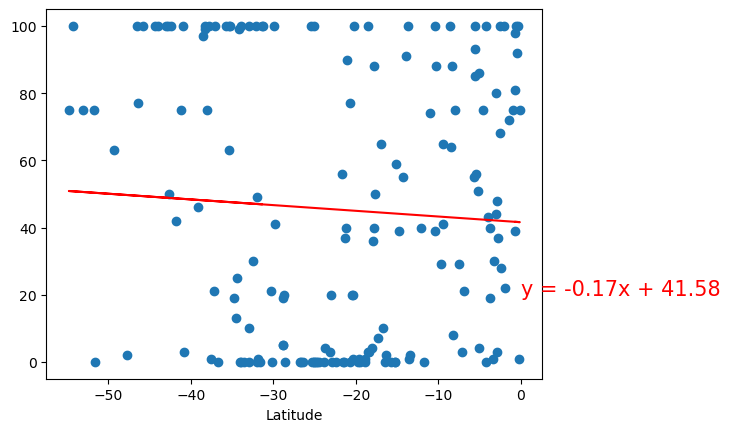

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
linear_regression_plots(x_values,y_values,'Cloudiness',(-30,30))

**Discussion about the linear relationship:** Both northern and southern regions does not show a good fit as the r-squared is 12% and 6%, respectively. There isnt a direct relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

r-squared is: -0.08212012176263574


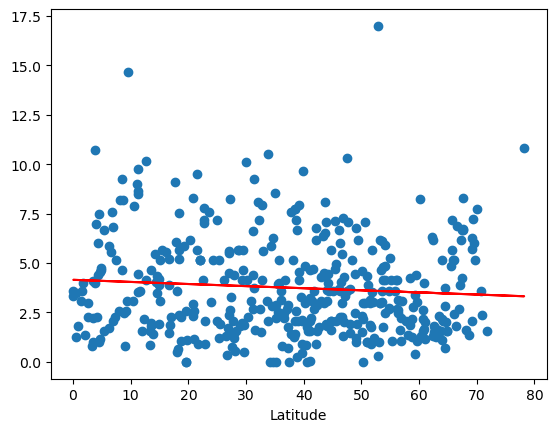

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df["Wind Speed"]
linear_regression_plots(x_values,y_values,'Wind Speed',(40,25))

r-squared is: -0.15832761029601305


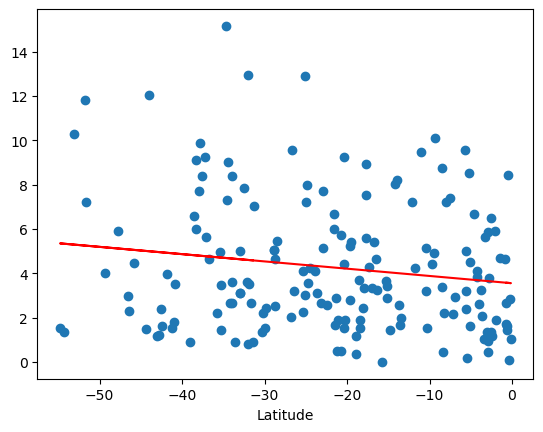

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
linear_regression_plots(x_values,y_values,'Wind Speed',(-30,30))

**Discussion about the linear relationship:** Both northern and southern regions does not show a good fit as the r-squared is 8% and 15%, respectively. There isnt a direct relationship between latitude and windspeed.